# COMPUTER NETWORK TRAFFIC ANALYSIS NOTEBOOK

###### This notebook is the work of Michael Baek and Richard Youn using Anaconda, partnered with Stephen Taing and Paul Raffaele who are working with the same dataset using Splunk. The dataset is available here: https://www.kaggle.com/crawford/computer-network-traffic. This dataset's column names have been adjusted for simplifying our purposes


#### The challenge on kaggle.com is described as below:
Context

Computer Network Traffic Data - A ~500K CSV with summary of some real network traffic data from the past. The dataset has ~21K rows and covers 10 local workstation IPs over a three month period. Half of these local IPs were compromised at some point during this period and became members of various botnets.

Content

Each row consists of four columns:

date: yyyy-mm-dd (from 2006-07-01 through 2006-09-30)
l_ipn: local IP (coded as an integer from 0-9)
r_asn: remote ASN (an integer which identifies the remote ISP)
f: flows (count of connnections for that day)
Reports of "odd" activity or suspicions about a machine's behavior triggered investigations on the following days (although the machine might have been compromised earlier)

Date : IP 08-24 : 1 09-04 : 5 09-18 : 4 09-26 : 3 6

Acknowledgements

This public dataset was found on http://statweb.stanford.edu/~sabatti/data.html

Inspiration

Can you discover when a compromise has occurred by a change in the pattern of communication?


In [1]:
"""
Importing libraries we will use for this project
-Pandas is used to read in the dataset and generates a dataframe from the .csv file.
-Seaborn and Matplotlib are data visualization libraries.
-Numpy is used for the sake of treating the data as arrays instead of parts of a dataframe
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#adjusting the scale of the font for readability
sns.set(font_scale = 1.25)

#reading in the .csv file using Pandas (pd)
df = pd.read_csv('ip_network_date_adjusted.csv')

In [6]:
#getting some generic information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 4 columns):
date          20803 non-null int64
local_ip      20803 non-null int64
remote_asn    20803 non-null int64
flows         20803 non-null int64
dtypes: int64(4)
memory usage: 650.2 KB


### Plotting the all Remote_ASN #'s vs Dates

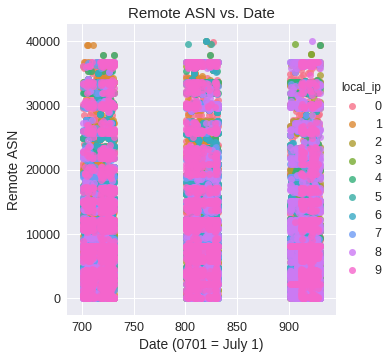

In [10]:
fig_all = sns.lmplot(data=df, x='date',y='remote_asn',hue='local_ip',fit_reg=False)
fig_all.set(xlabel = 'Date (0701 = July 1)', ylabel = 'Remote ASN', title = 'Remote ASN vs. Date')

### Plotting the all Flows vs Dates

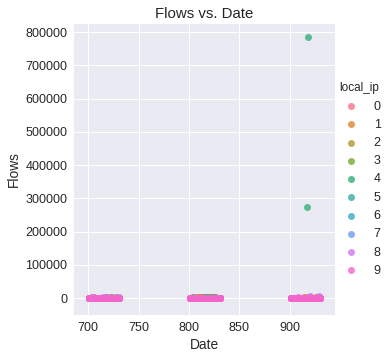

In [11]:
fig_all_flows = sns.lmplot(data=df, x='date', y='flows',hue='local_ip', fit_reg=False)
fig_all_flows.set(xlabel = 'Date', ylabel = 'Flows', title = 'Flows vs. Date')

Both figures above are not very helpful to us. The only bit of useful information is that sometime in September, there was an extremely large spike in the number of flows for local_ip addresses 4 and 5, which could potentially indicate a threat.

Let's break it down month by month


In [12]:
month_df = pd.read_csv('ip_network_date_adjusted_all.csv')

In [15]:
#checking the first 5 entries to see if it loaded properly
month_df.head()

,date_july,local_ip_july,remote_asn_july,flows_july,date_aug,local_ip_aug,remote_asn_aug,flows_aug,date_sept,local_ip_sept,remote_asn_sept,flows_sept
0,701,0,701,1,801.0,0.0,209.0,1.0,901.0,0.0,209.0,1.0
1,701,0,714,1,801.0,0.0,701.0,6.0,901.0,0.0,701.0,2.0
2,701,0,1239,1,801.0,0.0,1103.0,1.0,901.0,0.0,1239.0,1.0
3,701,0,1680,1,801.0,0.0,2856.0,1.0,901.0,0.0,2152.0,1.0
4,701,0,2514,1,801.0,0.0,3112.0,1.0,901.0,0.0,2828.0,1.0


In [17]:
#getting information on the column names
month_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 12 columns):
date_july          7672 non-null int64
local_ip_july      7672 non-null int64
remote_asn_july    7672 non-null int64
flows_july         7672 non-null int64
date_aug           7437 non-null float64
local_ip_aug       7437 non-null float64
remote_asn_aug     7437 non-null float64
flows_aug          7437 non-null float64
date_sept          5694 non-null float64
local_ip_sept      5694 non-null float64
remote_asn_sept    5694 non-null float64
flows_sept         5694 non-null float64
dtypes: float64(8), int64(4)
memory usage: 719.3 KB


In [18]:
#simple statistical information
month_df.describe()

,date_july,local_ip_july,remote_asn_july,flows_july,date_aug,local_ip_aug,remote_asn_aug,flows_aug,date_sept,local_ip_sept,remote_asn_sept,flows_sept
count,7672.000000,7672.000000,7672.000000,7672.000000,7437.000000,7437.000000,7437.000000,7437.000000,5694.000000,5694.000000,5694.000000,5694.000000
mean,717.046663,4.077815,11862.152242,37.160845,815.671238,4.211779,12105.633723,48.124513,915.770987,4.452406,12553.116965,230.189322
std,9.022671,3.280414,9397.927235,218.453193,9.050908,3.259889,9837.533167,292.597714,8.445643,3.287196,10140.413936,11010.823552
min,701.000000,0.000000,3.000000,1.000000,801.000000,0.000000,3.000000,1.000000,901.000000,0.000000,3.000000,1.000000
25%,709.000000,1.000000,4436.000000,1.000000,808.000000,1.000000,4323.000000,1.000000,909.000000,2.000000,4323.000000,1.000000
50%,718.000000,4.000000,8764.000000,2.000000,816.000000,4.000000,8553.000000,2.000000,915.000000,4.000000,9156.000000,2.000000
75%,725.000000,7.000000,17225.000000,7.000000,823.000000,7.000000,17785.000000,8.000000,923.000000,8.000000,18924.000000,9.000000
max,731.000000,9.000000,39386.000000,4422.000000,831.000000,9.000000,40028.000000,4718.000000,930.000000,9.000000,40092.000000,784234.000000


# Flows vs Dates, Remote_ASN vs Dates for all of July

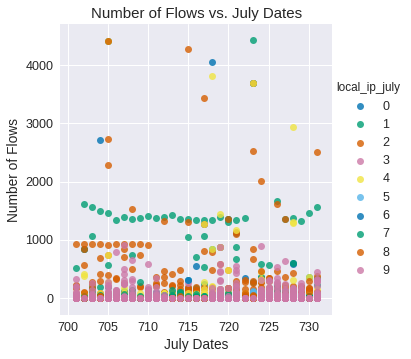

In [20]:
fig_july_flows = sns.lmplot(data=month_df, x='date_july', y='flows_july', hue='local_ip_july', fit_reg = False, palette = 'colorblind')
fig_july_flows.set(xlabel='July Dates', ylabel='Number of Flows', title='Number of Flows vs. July Dates')

I want to assume that the outliers that have unusually high number of flows are incidences where the nodes may have been compromised. 

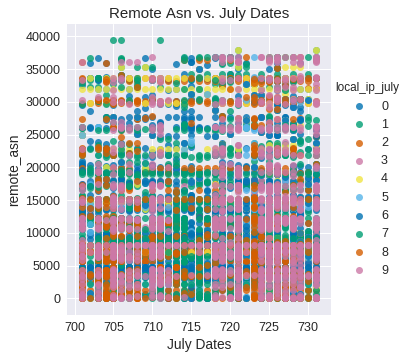

In [21]:
fig_july_flows = sns.lmplot(data=month_df, x='date_july', y='remote_asn_july', hue='local_ip_july', fit_reg = False, palette = 'colorblind')
fig_july_flows.set(xlabel='July Dates', ylabel='remote_asn', title='Remote Asn vs. July Dates')

### Now to look at it by each node

In [22]:
nodes_df = pd.read_csv('ip_network_node_adjusted_full.csv')

Here we renamed the data so the number that follows the description on the column name is the node number that is corresponds to

In [24]:
nodes_df.head()

,date0,local_ip0,remote_asn0,flows0,date1,local_ip1,remote_asn1,flows1,date2,local_ip2,...,remote_asn7,flows7,date8,local_ip8,remote_asn8,flows8,date9,local_ip9,remote_asn9,flows9
0,701,0,701,1,701.0,1.0,680.0,1.0,701.0,2.0,...,109.0,7.0,701.0,8.0,25.0,4.0,701.0,9.0,102.0,43.0
1,701,0,714,1,701.0,1.0,1239.0,6.0,701.0,2.0,...,2152.0,46.0,701.0,8.0,26.0,3.0,701.0,9.0,209.0,6.0
2,701,0,1239,1,701.0,1.0,2828.0,2.0,701.0,2.0,...,3356.0,55.0,701.0,8.0,109.0,7.0,701.0,9.0,559.0,1.0
3,701,0,1680,1,701.0,1.0,3265.0,519.0,701.0,2.0,...,3491.0,3.0,701.0,8.0,209.0,4.0,701.0,9.0,701.0,8.0
4,701,0,2514,1,701.0,1.0,4134.0,9.0,701.0,2.0,...,3561.0,35.0,701.0,8.0,557.0,10.0,701.0,9.0,1239.0,17.0


In [25]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 40 columns):
date0          3980 non-null int64
local_ip0      3980 non-null int64
remote_asn0    3980 non-null int64
flows0         3980 non-null int64
date1          2159 non-null float64
local_ip1      2159 non-null float64
remote_asn1    2159 non-null float64
flows1         2159 non-null float64
date2          2416 non-null float64
local_ip2      2416 non-null float64
remote_asn2    2416 non-null float64
flows2         2416 non-null float64
date3          1186 non-null float64
local_ip3      1186 non-null float64
remote_asn3    1186 non-null float64
flows3         1186 non-null float64
date4          1308 non-null float64
local_ip4      1308 non-null float64
remote_asn4    1308 non-null float64
flows4         1308 non-null float64
date5          1249 non-null float64
local_ip5      1249 non-null float64
remote_asn5    1249 non-null float64
flows5         1249 non-null float64
date6        

In [26]:
nodes_df.describe()

,date0,local_ip0,remote_asn0,flows0,date1,local_ip1,remote_asn1,flows1,date2,local_ip2,...,remote_asn7,flows7,date8,local_ip8,remote_asn8,flows8,date9,local_ip9,remote_asn9,flows9
count,3980.000000,3980.0,3980.000000,3980.000000,2159.000000,2159.0,2159.000000,2159.000000,2416.000000,2416.0,...,2233.000000,2233.000000,2230.000000,2230.0,2230.000000,2230.000000,2737.000000,2737.0,2737.000000,2737.000000
mean,813.432915,0.0,11890.358040,26.426382,758.651227,1.0,11229.380269,90.639648,823.544702,2.0,...,12554.121361,15.836095,832.334529,8.0,11229.523767,53.902691,798.106321,9.0,13332.503106,39.743149
std,81.855206,0.0,9104.685237,232.733282,48.231564,0.0,8822.305849,466.006782,81.791922,0.0,...,9820.077955,41.948103,81.293514,0.0,10093.311853,341.605457,77.051793,0.0,9917.481212,108.232832
min,701.000000,0.0,4.000000,1.000000,701.000000,1.0,3.000000,1.000000,701.000000,2.0,...,3.000000,1.000000,701.000000,8.0,3.000000,1.000000,701.000000,9.0,3.000000,1.000000
25%,723.000000,0.0,4808.000000,1.000000,716.000000,1.0,4323.000000,1.000000,727.000000,2.0,...,4134.000000,2.000000,729.000000,8.0,3557.000000,2.000000,724.000000,9.0,6318.000000,2.000000
50%,815.000000,0.0,8708.000000,1.000000,728.000000,1.0,8708.000000,2.000000,821.000000,2.0,...,9471.000000,4.000000,825.500000,8.0,8070.000000,4.000000,804.000000,9.0,11486.000000,6.000000
75%,908.000000,0.0,17228.000000,2.000000,811.000000,1.0,15214.000000,5.000000,910.000000,2.0,...,18924.000000,13.000000,911.000000,8.0,15270.000000,9.000000,829.000000,9.0,19024.000000,21.000000
max,930.000000,0.0,39834.000000,5059.000000,828.000000,1.0,40028.000000,4718.000000,930.000000,2.0,...,36856.000000,1057.000000,930.000000,8.0,40092.000000,7902.000000,930.000000,9.0,36856.000000,1027.000000


### Local_ip 0 

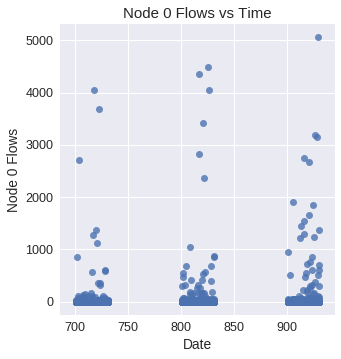

In [32]:
node0flows = sns.lmplot(data=nodes_df, x='date0', y='flows0', fit_reg= False)
node0flows.set(xlabel = "Date", ylabel = "Node 0 Flows", title= "Node 0 Flows vs Time")

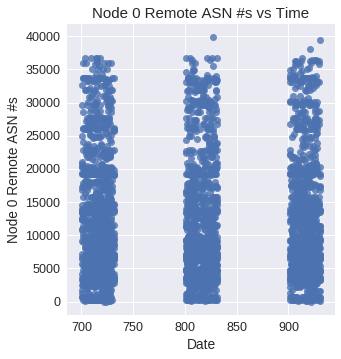

In [33]:
node0asn = sns.lmplot(data=nodes_df, x='date0', y='remote_asn0', fit_reg= False)
node0asn.set(xlabel = "Date", ylabel = "Node 0 Remote ASN #s", title= "Node 0 Remote ASN #s vs Time")

### Local IP 1

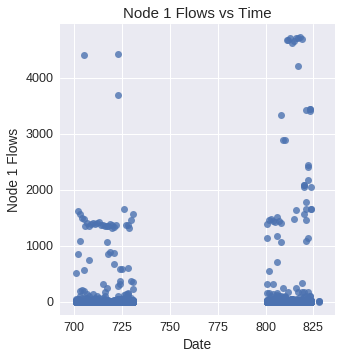

In [36]:
node1flows = sns.lmplot(data=nodes_df, x='date1', y='flows1', fit_reg= False)
node1flows.set(xlabel = "Date", ylabel = "Node 1 Flows", title= "Node 1 Flows vs Time")

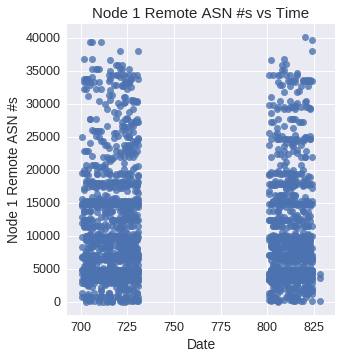

In [37]:
node1asn = sns.lmplot(data=nodes_df, x='date1', y='remote_asn1', fit_reg= False)
node1asn.set(xlabel = "Date", ylabel = "Node 1 Remote ASN #s", title= "Node 1 Remote ASN #s vs Time")

### Local IP 2

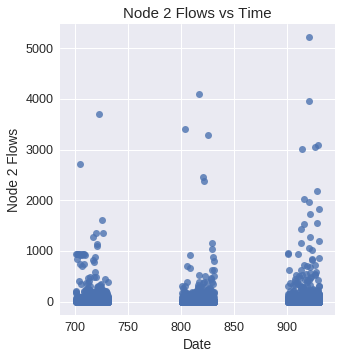

In [40]:
node2flows = sns.lmplot(data=nodes_df, x='date2', y='flows2', fit_reg= False)
node2flows.set(xlabel = "Date", ylabel = "Node 2 Flows", title= "Node 2 Flows vs Time")

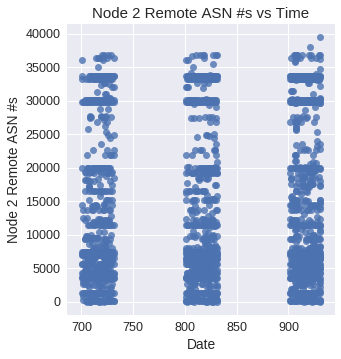

In [41]:
node2asn = sns.lmplot(data=nodes_df, x='date2', y='remote_asn2', fit_reg= False)
node2asn.set(xlabel = "Date", ylabel = "Node 2 Remote ASN #s", title= "Node 2 Remote ASN #s vs Time")

### Local IP 3

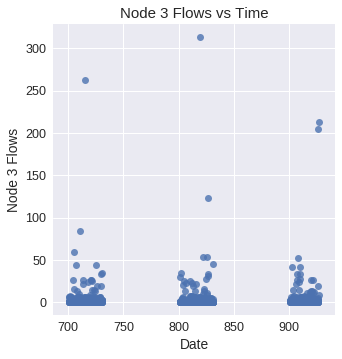

In [44]:
node3flows = sns.lmplot(data=nodes_df, x='date3', y='flows3', fit_reg= False)
node3flows.set(xlabel = "Date", ylabel = "Node 3 Flows", title= "Node 3 Flows vs Time")

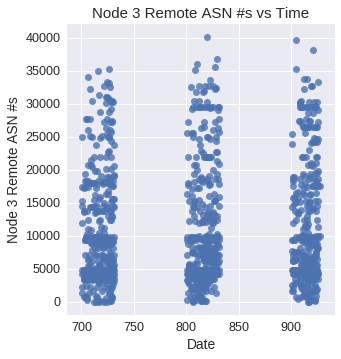

In [45]:
node3asn = sns.lmplot(data=nodes_df, x='date3', y='remote_asn3', fit_reg= False)
node3asn.set(xlabel = "Date", ylabel = "Node 3 Remote ASN #s", title= "Node 3 Remote ASN #s vs Time")

### Local IP 4

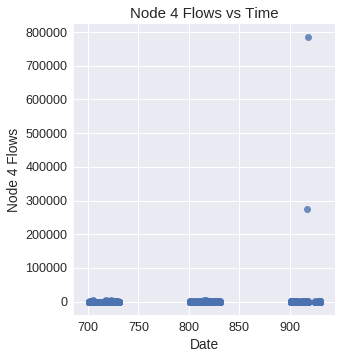

In [46]:
node4flows = sns.lmplot(data=nodes_df, x='date4', y='flows4', fit_reg= False)
node4flows.set(xlabel = "Date", ylabel = "Node 4 Flows", title= "Node 4 Flows vs Time")

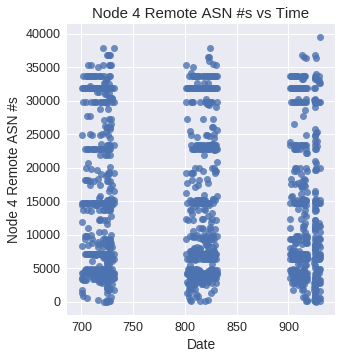

In [47]:
node4asn = sns.lmplot(data=nodes_df, x='date4', y='remote_asn4', fit_reg= False)
node4asn.set(xlabel = "Date", ylabel = "Node 4 Remote ASN #s", title= "Node 4 Remote ASN #s vs Time")

### Local IP 5

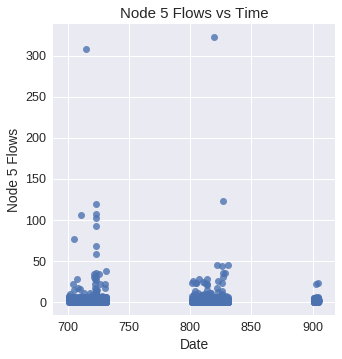

In [48]:
node5flows = sns.lmplot(data=nodes_df, x='date5', y='flows5', fit_reg= False)
node5flows.set(xlabel = "Date", ylabel = "Node 5 Flows", title= "Node 5 Flows vs Time")

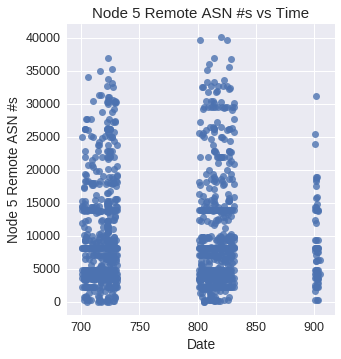

In [49]:
node5asn = sns.lmplot(data=nodes_df, x='date5', y='remote_asn5', fit_reg= False)
node5asn.set(xlabel = "Date", ylabel = "Node 5 Remote ASN #s", title= "Node 5 Remote ASN #s vs Time")

### Local IP 6

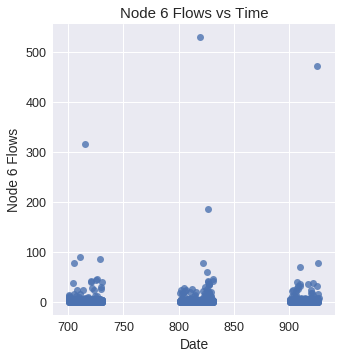

In [50]:
node6flows = sns.lmplot(data=nodes_df, x='date6', y='flows6', fit_reg= False)
node6flows.set(xlabel = "Date", ylabel = "Node 6 Flows", title= "Node 6 Flows vs Time")

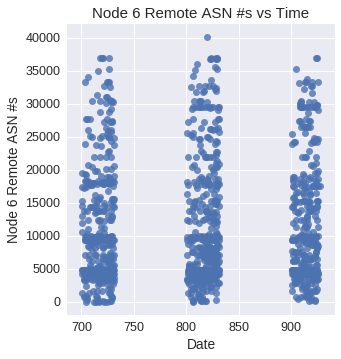

In [51]:
node6asn = sns.lmplot(data=nodes_df, x='date6', y='remote_asn6', fit_reg= False)
node6asn.set(xlabel = "Date", ylabel = "Node 6 Remote ASN #s", title= "Node 6 Remote ASN #s vs Time")

### Local IP 7

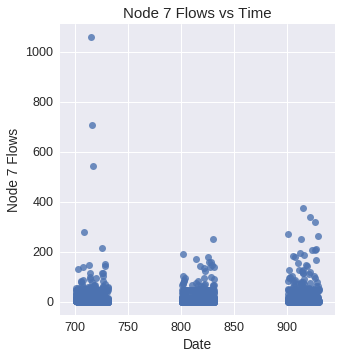

In [52]:
node7flows = sns.lmplot(data=nodes_df, x='date7', y='flows7', fit_reg= False)
node7flows.set(xlabel = "Date", ylabel = "Node 7 Flows", title= "Node 7 Flows vs Time")


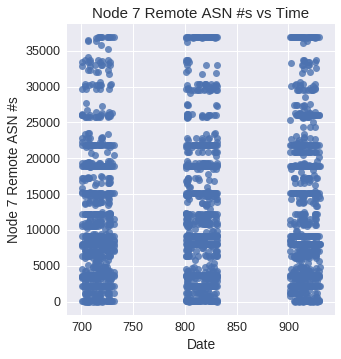

In [53]:
node7asn = sns.lmplot(data=nodes_df, x='date7', y='remote_asn7', fit_reg= False)
node7asn.set(xlabel = "Date", ylabel = "Node 7 Remote ASN #s", title= "Node 7 Remote ASN #s vs Time")

### Local IP 8

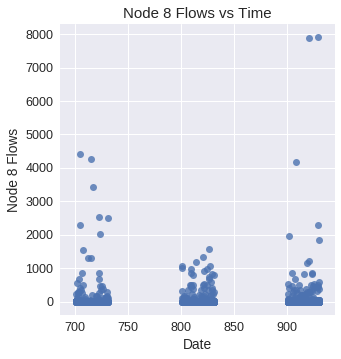

In [54]:
node8flows = sns.lmplot(data=nodes_df, x='date8', y='flows8', fit_reg= False)
node8flows.set(xlabel = "Date", ylabel = "Node 8 Flows", title= "Node 8 Flows vs Time")

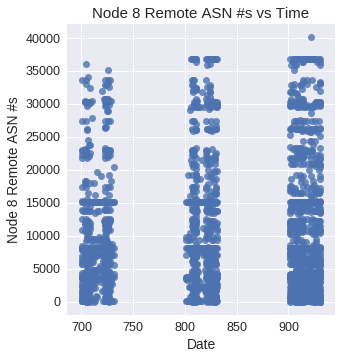

In [55]:
node8asn = sns.lmplot(data=nodes_df, x='date8', y='remote_asn8', fit_reg= False)
node8asn.set(xlabel = "Date", ylabel = "Node 8 Remote ASN #s", title= "Node 8 Remote ASN #s vs Time")

### Local IP 9

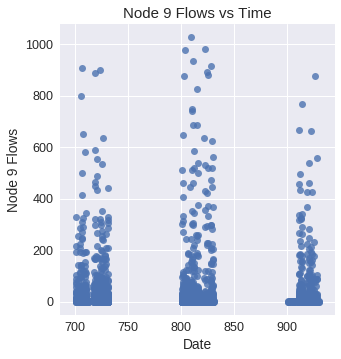

In [56]:
node9flows = sns.lmplot(data=nodes_df, x='date9', y='flows9', fit_reg= False)
node9flows.set(xlabel = "Date", ylabel = "Node 9 Flows", title= "Node 9 Flows vs Time")

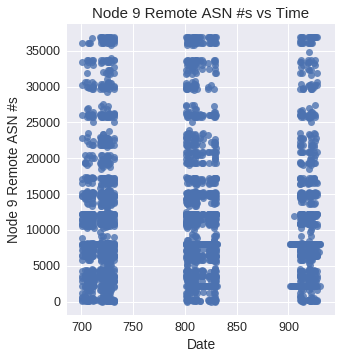

In [57]:
node9asn = sns.lmplot(data=nodes_df, x='date9', y='remote_asn9', fit_reg= False)
node9asn.set(xlabel = "Date", ylabel = "Node 9 Remote ASN #s", title= "Node 9 Remote ASN #s vs Time")

# Flows vs Dates, Remote_ASN vs Dates for all of August

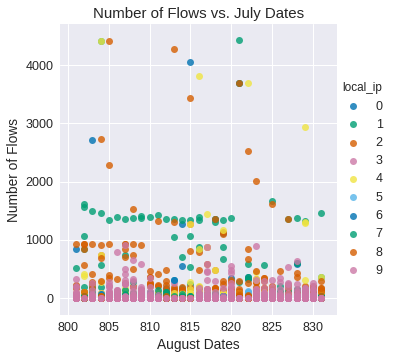

In [52]:
fig_aug_flows = sns.lmplot(data=month_df, x='dates_august', y='flows', hue='local_ip', fit_reg = False, palette = 'colorblind')
fig_aug_flows.set(xlabel='August Dates', ylabel='Number of Flows', title='Number of Flows vs. July Dates')